In [112]:
from data_and_denoising import *

In [71]:
tickers = getTickers()
end = dt.now()
start = dt.fromisoformat('2012-10-15')

In [72]:
data = getData(start, end, tickers, True) 

Data was loaded sucessfully!


In [78]:
indicies_to_remove = data.isna().sum().sort_values(ascending=False).head(40).index

In [79]:
data.drop(indicies_to_remove, axis = 1, inplace = True)

In [80]:
m = getCorrMatrix(data)

In [81]:
m.shape

(423, 423)

In [82]:
eVal0, eVec0, eVal1, eVec1, corr1, var0 = denoiseMatrix(m, 1)

/Users/dario/Desktop/Projects/thesis/algorithm/data_and_denoising.py:54: RuntimeWarning: divide by zero encountered in divide
  pdf=q/(2*np.pi*var*eVal)*((eMax-eVal)*(eVal-eMin))**.5
/Users/dario/Desktop/Projects/thesis/algorithm/data_and_denoising.py:54: RuntimeWarning: invalid value encountered in multiply
  pdf=q/(2*np.pi*var*eVal)*((eMax-eVal)*(eVal-eMin))**.5
/Users/dario/Desktop/Projects/thesis/algorithm/data_and_denoising.py:54: RuntimeWarning: divide by zero encountered in divide
  pdf=q/(2*np.pi*var*eVal)*((eMax-eVal)*(eVal-eMin))**.5
/Users/dario/Desktop/Projects/thesis/algorithm/data_and_denoising.py:54: RuntimeWarning: invalid value encountered in multiply
  pdf=q/(2*np.pi*var*eVal)*((eMax-eVal)*(eVal-eMin))**.5
/Users/dario/Desktop/Projects/thesis/algorithm/data_and_denoising.py:54: RuntimeWarning: divide by zero encountered in divide
  pdf=q/(2*np.pi*var*eVal)*((eMax-eVal)*(eVal-eMin))**.5
/Users/dario/Desktop/Projects/thesis/algorithm/data_and_denoising.py:54: RuntimeWar

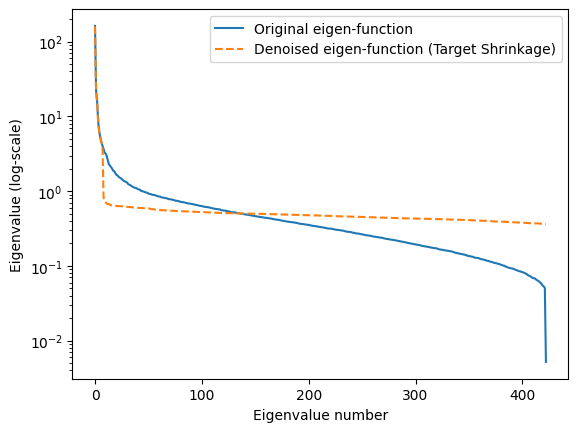

In [83]:
plotEvalDiff(eVal0, eVal1, 2)

In [85]:
corr2 = detoneMatrix(corr1, eVal1, eVec1)

In [86]:
corr2 = pd.DataFrame(cov2corr(corr2))

In [113]:
w = optPort_nco(corr2, maxNumClusters = 10)

maxNumClusters10


100%|██████████| 9/9 [00:01<00:00,  7.27it/s]


In [114]:
w

array([[-2.23647211e-03],
       [ 6.67760467e-03],
       [ 1.84062589e-03],
       [ 5.99517802e-03],
       [ 1.71980720e-03],
       [-3.19944095e-03],
       [ 2.43720567e-03],
       [-3.34364396e-03],
       [ 7.15622486e-03],
       [ 5.72431957e-03],
       [ 2.63849099e-03],
       [ 3.15097779e-03],
       [-8.42158985e-04],
       [-1.12961811e-03],
       [ 6.81992242e-03],
       [ 8.19879570e-04],
       [-2.18842626e-03],
       [ 5.02675149e-03],
       [ 4.48456577e-03],
       [ 7.43009674e-04],
       [ 4.89009354e-03],
       [ 4.26552608e-03],
       [-1.47427343e-03],
       [ 7.65966150e-03],
       [ 7.57360107e-03],
       [ 3.79076173e-03],
       [ 4.45893622e-03],
       [ 5.78117365e-03],
       [ 7.67702993e-04],
       [ 4.15402280e-03],
       [-4.71569543e-03],
       [-9.37369543e-05],
       [-2.21114765e-03],
       [ 4.90911966e-03],
       [ 4.32428366e-03],
       [-1.55221662e-03],
       [ 6.01639494e-03],
       [ 6.73010684e-03],
       [ 6.2

In [90]:
w_ = w.reshape(-1)

In [91]:
data["port_ret"] =  wscore = data.apply(lambda row: np.average(row, weights = w_), axis=1)

In [92]:
data["cum_ret"] = np.cumprod(1 + data['port_ret'].values) - 1

In [93]:
ref = downloadReturns(start, end, ["SPY"])

In [94]:
ref["spx_ret"] = np.cumprod(1 + ref['SPY'].values) - 1

In [95]:
ref.drop("SPY", axis = 1, inplace = True)

In [96]:
ref.index = ref.index.astype(str)

In [97]:
rets = pd.DataFrame(data["cum_ret"]).merge(ref, how = "outer", left_index = True, right_index = True)

In [98]:
rets = rets.dropna(axis = 0, how = "any")

In [99]:
rets

,cum_ret,spx_ret
Date,,
2012-10-16,0.018007,0.010133
2012-10-17,0.021910,0.014714
2012-10-18,0.022070,0.012077
2012-10-19,0.006343,-0.004789
2012-10-22,0.006494,-0.004650
...,...,...
2022-10-05,2.673686,1.617226
2022-10-06,2.625403,1.590228
2022-10-07,2.528433,1.517976


In [100]:
import seaborn as sb

<AxesSubplot: xlabel='Date'>

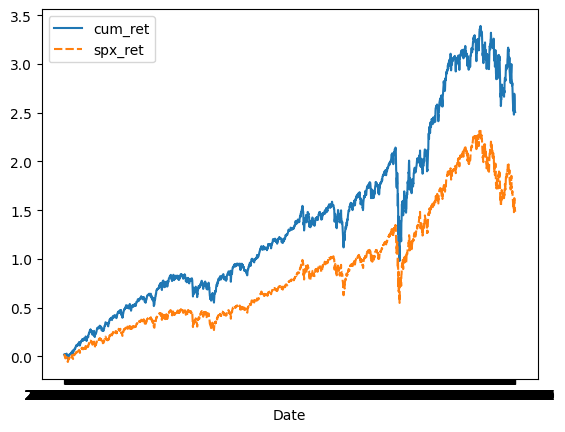

In [101]:
sb.lineplot(rets)

In [108]:
rets["spx_ret"].tail(1).values[0]

1.4829260528040002

In [109]:
spx_abs = rets["spx_ret"].tail(1).values[0]
spx_ann = spx_abs/10 #we have a period of app. 10 years
spx_vol = np.std(rets["spx_ret"])
spx_sr = spx_abs/spx_vol

In [110]:
cum_abs = rets["cum_ret"].tail(1).values[0]
cum_ann = cum_abs/10 #we have a period of app. 10 years
cum_vol = np.std(rets["cum_ret"])
cum_sr = cum_abs/cum_vol

In [111]:
compare = pd.DataFrame({"Absolute return":[spx_abs,cum_abs], "Annualized return":[spx_ann,cum_ann], "Volatility":[spx_vol,cum_vol], "Sharpe ratio": [spx_sr, cum_sr]})
compare.rename(index={0:"spx",1:"cum"}, inplace = True)
compare

,Absolute return,Annualized return,Volatility,Sharpe ratio
spx,1.482926,0.148293,0.605320,2.449820
cum,2.506506,0.250651,0.903328,2.774747
